In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## 1. Sex

### 1.1 Baseline FPR Sex

In [2]:
baseline_sex_fpr=pd.read_csv('./Basline_FPR/baseline_sex_fpr.csv')
baseline_sex_fpr.set_index('index', inplace=True)
baseline_sex_fpr


,FPR_M,FPR_F
index,,
mean,0.219000,0.249600
std,0.007874,0.007893


In [3]:
sex = ['M', 'F']
FPR = baseline_sex_fpr.loc['mean'][['FPR_M', 'FPR_F']].values
CI = 1.96 * baseline_sex_fpr.loc['std'][['FPR_M', 'FPR_F']].values / np.sqrt(5)

baseline_sex_df = pd.DataFrame({
    "sex": sex,
    "FPR": FPR,
    "CI_FPR": CI
})


In [4]:
baseline_sex_df

,sex,FPR,CI_FPR
0,M,0.2190,0.006902
1,F,0.2496,0.006919


### 1.2 BiomedClip FPR  Sex

In [5]:
biomedclip_sex_df=pd.read_csv("./FPR/Subgroup_FPR_Sex.csv")
biomedclip_sex_df=biomedclip_sex_df[["sex","FPR","CI_FPR"]]
biomedclip_sex_df

,sex,FPR,CI_FPR
0,M,0.257,0.005
1,F,0.276,0.004


### 1.3 CXR FPR Sex

In [6]:
cxr_sex_df=pd.read_csv("./CXR_Foundation/SubGroup_FPR/Subgroup_FNR_FPR_Sex.csv")
cxr_sex_df=cxr_sex_df[["sex","FPR","CI_FPR"]]
cxr_sex_df

,sex,FPR,CI_FPR
0,M,0.161,0.009
1,F,0.197,0.010


## 2. Age

### 2.1 Baseline FPR Age

In [7]:
F_age_df=pd.read_csv('./Basline_FPR/baseline_age_fpr.csv')
F_age_df.set_index('index', inplace=True)
F_age_df

,FPR_0-20,FPR_20-40,FPR_40-60,FPR_60-80,FPR_80-
index,,,,,
mean,0.485600,0.390200,0.273800,0.162800,0.114200
std,0.026987,0.011904,0.007463,0.007662,0.007463


In [8]:


ages = ['0-20','20-40','40-60','60-80','80-']
FPR = [F_age_df.loc['mean']['FPR_0-20'],F_age_df.loc['mean']['FPR_20-40'],
       F_age_df.loc['mean']['FPR_40-60'],F_age_df.loc['mean']['FPR_60-80'],
       F_age_df.loc['mean']['FPR_80-']]

CI = 1.96 * F_age_df.loc['std'] / np.sqrt(5)
error = [CI['FPR_0-20'],CI['FPR_20-40'],CI['FPR_40-60'],
         CI['FPR_60-80'],CI['FPR_80-']]

baseline_age_df = pd.DataFrame({
    "age": ages,
    "FPR": FPR,
    "CI_FPR": error
})

In [9]:
baseline_age_df

,age,FPR,CI_FPR
0,0-20,0.4856,0.023655
1,20-40,0.3902,0.010434
2,40-60,0.2738,0.006542
3,60-80,0.1628,0.006716
4,80-,0.1142,0.006542


### 2.2 BiomedClip FPR Age

In [10]:
biomedclip_age_df = pd.read_csv("./FPR/Subgroup_FPR_Age.csv")
biomedclip_age_df=biomedclip_age_df[["age","FPR","CI_FPR"]]
biomedclip_age_df

,age,FPR,CI_FPR
0,0-20,NaN,NaN
1,20-40,0.385,0.003
2,40-60,0.312,0.005
3,60-80,0.238,0.006
4,80+,0.214,0.003


### 2.3 CXR FPR  Age
  

In [11]:
cxr_age_df=pd.read_csv('./CXR_Foundation/SubGroup_FPR/Subgrounp_FNR_FPR_Age.csv')
cxr_age_df=cxr_age_df[["Age","FPR","CI_FPR"]]
cxr_age_df.rename(columns={'Age':'age'},inplace=True)
cxr_age_df.replace({"FPR": {0.539: np.nan}, "CI_FPR": {0.044: np.nan}}, inplace=True)

cxr_age_df

,age,FPR,CI_FPR
0,0-20,NaN,NaN
1,20-40,0.243,0.012
2,40-60,0.229,0.012
3,60-80,0.153,0.009
4,80+,0.126,0.008


## 3. Race
### 3.1. Baseline race

In [12]:
F_race_df=pd.read_csv("./Basline_FPR/baseline_race_fpr.csv")
F_race_df.set_index('index', inplace=True)
F_race_df

,FPR_White,FPR_Black,FPR_Hisp,FPR_Other,FPR_Asian,FPR_American
index,,,,,,
mean,0.17020,0.276200,0.274800,0.176400,0.216600,0.175800
std,0.00719,0.007014,0.013161,0.008355,0.008325,0.036273


In [13]:

races = ['White','Black','Hisp','Other','Asian','American']

FPR = [F_race_df.loc['mean']['FPR_White'],F_race_df.loc['mean']['FPR_Black'],
       F_race_df.loc['mean']['FPR_Hisp'],F_race_df.loc['mean']['FPR_Other'],
       F_race_df.loc['mean']['FPR_Asian'],F_race_df.loc['mean']['FPR_American']]

CI = 1.96 * F_race_df.loc['std'] / np.sqrt(5)
error = [CI['FPR_White'],CI['FPR_Black'],CI['FPR_Hisp'],
         CI['FPR_Other'],CI['FPR_Asian'],CI['FPR_American']]

baseline_race_df = pd.DataFrame({
    "race": races,
    "FPR": FPR,
    "CI_FPR": error
})

baseline_race_df

,race,FPR,CI_FPR
0,White,0.1702,0.006303
1,Black,0.2762,0.006148
2,Hisp,0.2748,0.011536
3,Other,0.1764,0.007323
4,Asian,0.2166,0.007297
5,American,0.1758,0.031794


### 3.2. BiomedClip Race

In [14]:
biomedclip_race_df =pd.read_csv("./FPR/Subgroup_FPR_Race.csv")
biomedclip_race_df=biomedclip_race_df[["race","FPR","CI_FPR"]]

biomedclip_race_df.replace({"FPR": {0.400: np.nan}, "CI_FPR": {0.131: np.nan}}, inplace=True)

biomedclip_race_df

,race,FPR,CI_FPR
0,White,0.254,0.005
1,Black,0.297,0.004
2,Hisp,0.318,0.004
3,Other,0.279,0.007
4,Asian,0.232,0.005
5,American,NaN,NaN


### 3.3. CXR FPR Race

In [15]:
cxr_race_df=pd.read_csv('./CXR_Foundation/SubGroup_FPR//Subgroup_FNR_FPR_Race.csv')
cxr_race_df=cxr_race_df[["Race","FPR","CI_FPR"]]
cxr_race_df.rename(columns={"Race":"race"},inplace=True)
cxr_race_df

,race,FPR,CI_FPR
0,White,0.161,0.009
1,Black,0.234,0.014
2,Hisp,0.227,0.011
3,Other,0.151,0.009
4,Asian,0.196,0.007
5,American,0.150,0.018


## 4. Insurance 
### 4.1. Baseline FPR Insurance

In [16]:
FP_isnu_df=pd.read_csv('./Basline_FPR/baseline_insu_fpr.csv')
FP_isnu_df.set_index('index',inplace=True)

In [17]:
insurance = [ 'Medicare', 'Other', 'Medicaid']
FPR = [np.NAN,FP_isnu_df.loc['mean']['FPR_Other'],FP_isnu_df.loc['mean']['FPR_Medicaid']]
CI = 1.96 * FP_isnu_df.loc['std'] / np.sqrt(5)
error = [np.NAN,CI.loc['FPR_Other'],CI.loc['FPR_Medicaid']]

baseline_insu__df = pd.DataFrame({
    "insurance": insurance,
    "FPR": FPR,
    "CI_FPR": error
})
baseline_insu__df


,insurance,FPR,CI_FPR
0,Medicare,NaN,NaN
1,Other,0.2080,0.005259
2,Medicaid,0.2742,0.010580


### 4.2. BiomedClip FPR Insurance 

In [18]:
biomedclip_insu_df =pd.read_csv("./FPR/Subgroup_FPR_Insu.csv")
biomedclip_insu_df=biomedclip_insu_df[["insurance","FPR","CI_FPR"]]
biomedclip_insu_df

,insurance,FPR,CI_FPR
0,Medicare,0.240,0.005
1,Other,0.290,0.005
2,Medicaid,0.283,0.004


### 4.3. CXR FPR Insurance 

In [19]:
cxr_insu_df=pd.read_csv('./CXR_Foundation/SubGroup_FPR/Subgroup_FNR_FPR_Insu.csv')
cxr_insu_df=cxr_insu_df[["Insurance","FPR","CI_FPR"]]
cxr_insu_df.rename(columns={"Insurance":"insurance"},inplace=True)
cxr_insu_df

,insurance,FPR,CI_FPR
0,Medicare,0.160,0.010
1,Other,0.188,0.010
2,Medicaid,0.218,0.013


In [20]:
cxr_sex_df.columns[0]

'sex'

In [21]:
fontsize = 11

In [22]:
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

In [23]:
baseline_race_df["race"].replace("American","Native",inplace=True)
biomedclip_race_df["race"].replace("American","Native",inplace=True)
cxr_race_df["race"].replace("American","Native",inplace=True)

C:\Users\gebre\AppData\Local\Temp\ipykernel_12804\2247028929.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  baseline_race_df["race"].replace("American","Native",inplace=True)
C:\Users\gebre\AppData\Local\Temp\ipykernel_12804\2247028929.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

C:\Users\gebre\AppData\Local\Temp\ipykernel_12804\3787353318.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels,fontsize = fontsize,fontname='Times New Roman')


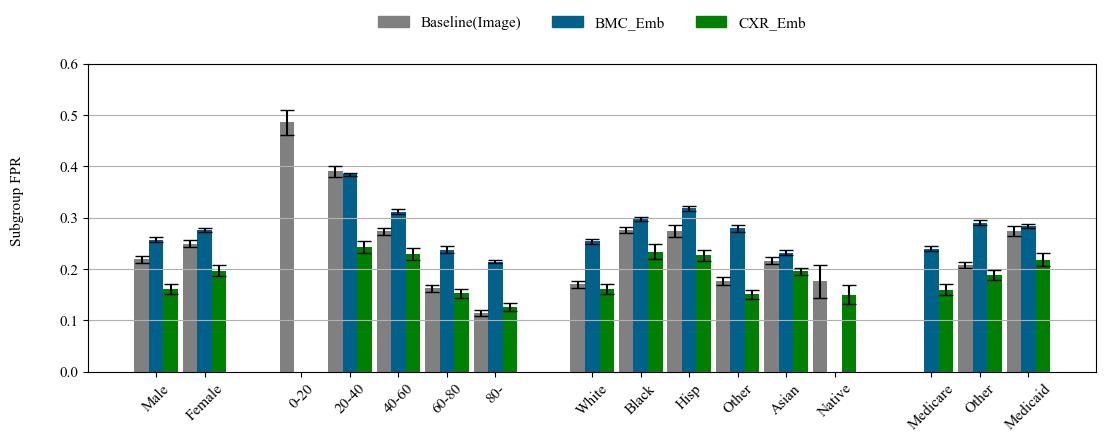

In [24]:

sex_labels = ['Male', 'Female']
age_labels = ['0-20', '20-40', '40-60', '60-80', '80+']
race_labels = ['White','Black','Hisp','Other','Asian','American']
insurance_labels = ['Medicare', 'Medicaid', 'Other']

# Define custom legend handles
legend_patches = [
    mpatches.Patch(color='gray', label='Baseline(Image)'),
    mpatches.Patch(color='#00618b', label='BMC_Emb'),
    mpatches.Patch(color='green', label='CXR_Emb')
]

# Combine all data into a single structure
categories = {
    "Sex": [baseline_sex_df,biomedclip_sex_df,cxr_sex_df],
    "Age": [baseline_age_df,biomedclip_age_df,cxr_age_df],
    "Race": [baseline_race_df,biomedclip_race_df,cxr_race_df],
    "Insurance": [baseline_insu__df,biomedclip_insu_df,cxr_insu_df]
}
# Plotting all data in one plot
fig1, ax = plt.subplots(figsize=(13,4))
models = ["Baseline Model","BioMedClip Model","CXR Model",]
colors = ['gray','#00618b','green']

x_labels = ['Male','Female']
x_positions = []
width = 0.3 
current_position = 0

#region subgroup FPR

for category, data in categories.items():
    
    category_labels = data[0][data[0].columns[0]].values
    
    if data[0].columns[0]!="sex":
        x_labels.extend(category_labels)
    
    x_positions.extend([current_position + i for i in range(len(category_labels))])

    for i, (model, df, color) in enumerate(zip(models, data, colors)):
        positions = np.array([current_position + j for j in range(len(category_labels))]) + i * width
        ax.bar(positions, df['FPR'], width, label=f'{model} ({category})' if i == 0 else "", color=color,
               yerr=df['CI_FPR'], capsize=5)

    current_position += len(category_labels) + 1  # Add spacing between categories

y_labels = ['0.0', '0.1', '0.2','0.3','0.4','0.5','0.6']

# ax.set_ylabel('Subgroup FPR',fontsize = fontsize)
ax.set_xticks([pos + width for pos in x_positions])
ax.set_xticklabels(x_labels,fontsize = fontsize, rotation=45,fontname='Times New Roman')
ax.set_yticklabels(y_labels,fontsize = fontsize,fontname='Times New Roman')

ax.yaxis.grid(True)
ax.set_ylim(top=0.6)

# Adding the legend at the top center side
# Create the legend
legend = ax.legend(handles=legend_patches, loc="upper center",
                   bbox_to_anchor=(0.5, 1.2), ncol=3, fontsize=fontsize, frameon=False)
# Manually set font for all legend text
for text in legend.get_texts():
    text.set_fontname('Times New Roman')

fig1.suptitle('Subgroup FPR',rotation=90,x=0.07,y=0.65,fontsize=fontsize,fontname='Times New Roman')
#endregion

#plt.savefig('./Subgroup_FPR_MIMC.pdf',bbox_inches='tight')
plt.savefig('./Subgroup_FPR_MIMC.pdf',bbox_inches='tight')

In [25]:

#region two group File paths
BASELINE_FILES = {
    "age_sex": "./Basline_FPR/Inter_AgeSex.csv",
    "race_sex": "./Basline_FPR/Inter_RaceSex.csv",
    "insurance_sex": "./Basline_FPR/Inter_SexIns.csv",
    "race_age": "./Basline_FPR/Inter_RaceAge.csv",
    "insurance_age": "./Basline_FPR/Inter_AgeIns.csv",
    "insurance_race": "./Basline_FPR/Inter_RaceIns.csv"
}

BiomedClip_FILES = {
    "age_sex": "./FPR/FPR_AgeSex.csv",
    "race_sex":"./FPR/FPR_SexRace.csv",
    "insurance_sex":"./FPR/FPR_SexIns.csv",
    "race_age": "./FPR/FPR_RaceAge.csv",
    "insurance_age": "./FPR/FPR_AgeIns.csv",
    "insurance_race": "./FPR/FPR_RaceIns.csv"
}

CXR_FILES = {
    "age_sex":"./CXR_Foundation/Two_Group_Intersection_FPR/Inter_AgeSex.csv",
    "race_sex":"./CXR_Foundation/Two_Group_Intersection_FPR/Inter_RaceSex.csv",
    "insurance_sex":"./CXR_Foundation/Two_Group_Intersection_FPR/Inter_SexIns.csv",
    "race_age": "./CXR_Foundation/Two_Group_Intersection_FPR/Inter_RaceAge.csv",
    "insurance_age": "./CXR_Foundation/Two_Group_Intersection_FPR/Inter_AgeIns.csv",
    "insurance_race": "./CXR_Foundation/Two_Group_Intersection_FPR/Inter_RaceIns.csv"
}

#endregion
# Load data
def load_data(file_paths):
    return {key: pd.read_csv(path) for key, path in file_paths.items()}

baseline_data = load_data(BASELINE_FILES)
biomedclip_data = load_data(BiomedClip_FILES)
cxr_data = load_data(CXR_FILES)

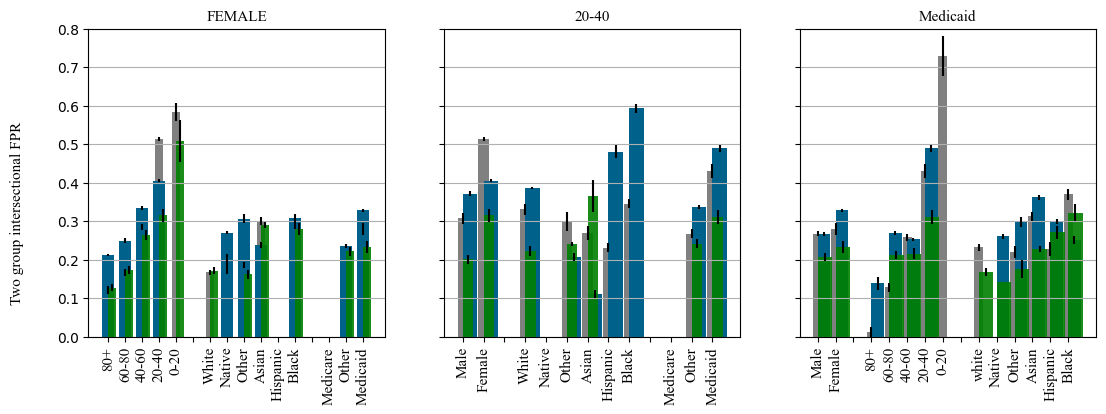

In [26]:

fig2, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 4), sharey=True)
plt.rcdefaults()
# ========================Results are calculated FPR_FNR_NF_Confidence_CheXpert.ipynb ===============================

# ===========================SEX Vs All other groups FPR ====================================================

#region ==========Baseline FPR(sex vs other groups)============================

sex = ('80-', '60-80', '40-60', '20-40','0-20','', 'White','Native','Other','Asian','Hispanic', 'Black','','Medicare','Other','Medicaid')
sex_pos = np.arange(len(sex))

FPR =   (
    baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='80-','F'].tolist()[0],
    baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='60-80','F'].tolist()[0],
    baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='40-60','F'].tolist()[0],
    baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='20-40','F'].tolist()[0],
    baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='0-20','F'].tolist()[0],
    np.NAN,
    baseline_data["race_sex"].loc[baseline_data["race_sex"]['race']=='WHITE','F'].tolist()[0],
    baseline_data["race_sex"].loc[baseline_data["race_sex"]['race']=='AMERICAN INDIAN/ALASKA NATIVE','F'].tolist()[0],
    baseline_data["race_sex"].loc[baseline_data["race_sex"]['race']=='OTHER','F'].tolist()[0],
    baseline_data["race_sex"].loc[baseline_data["race_sex"]['race']=='ASIAN','F'].tolist()[0],
    np.NAN,
    baseline_data["race_sex"].loc[baseline_data["race_sex"]['race']=='BLACK/AFRICAN AMERICAN','F'].tolist()[0],
    np.NAN,
    np.NAN,
    baseline_data["insurance_sex"].loc[baseline_data["insurance_sex"]['Insurance']=='Other','F'].tolist()[0],
    baseline_data["insurance_sex"].loc[baseline_data["insurance_sex"]['Insurance']=='Medicaid','F'].tolist()[0]
    )

error = (
    baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='80-','CI_F'].tolist()[0],
    baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='60-80','CI_F'].tolist()[0],
    baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='40-60','CI_F'].tolist()[0],
    baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='20-40','CI_F'].tolist()[0],
    baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='0-20','CI_F'].tolist()[0],
    np.NAN,
    baseline_data["race_sex"].loc[baseline_data["race_sex"]['race']=='WHITE','CI_F'].tolist()[0],
    baseline_data["race_sex"].loc[baseline_data["race_sex"]['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_F'].tolist()[0],
    baseline_data["race_sex"].loc[baseline_data["race_sex"]['race']=='OTHER','CI_F'].tolist()[0],
    baseline_data["race_sex"].loc[baseline_data["race_sex"]['race']=='ASIAN','CI_F'].tolist()[0],
    np.NAN,
    baseline_data["race_sex"].loc[baseline_data["race_sex"]['race']=='BLACK/AFRICAN AMERICAN','CI_F'].tolist()[0],
    np.NAN,
    np.NAN,
    baseline_data["insurance_sex"].loc[baseline_data["insurance_sex"]['Insurance']=='Other','CI_F'].tolist()[0],
    baseline_data["insurance_sex"].loc[baseline_data["insurance_sex"]['Insurance']=='Medicaid','CI_F'].tolist()[0]
    )

axes[0].bar(sex_pos, FPR, yerr=error, align='center',color=['grey'],width=0.5)

#endregion

#region ============================BioMedClip=================================

FPR =   (
    biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='80+','FPR_F'].tolist()[0],
    biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='60-80','FPR_F'].tolist()[0],
    biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='40-60','FPR_F'].tolist()[0],
    biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='20-40','FPR_F'].tolist()[0],
    biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='0-20','FPR_F'].tolist()[0],
    np.NAN,
    biomedclip_data["race_sex"].loc[biomedclip_data["race_sex"]['race']=='White','FPR_F'].tolist()[0],
    biomedclip_data["race_sex"].loc[biomedclip_data["race_sex"]['race']=='American','FPR_F'].tolist()[0],
    biomedclip_data["race_sex"].loc[biomedclip_data["race_sex"]['race']=='Other','FPR_F'].tolist()[0],
    biomedclip_data["race_sex"].loc[biomedclip_data["race_sex"]['race']=='Asian','FPR_F'].tolist()[0],
    np.NAN,
    biomedclip_data["race_sex"].loc[biomedclip_data["race_sex"]['race']=='Black','FPR_F'].tolist()[0],
    np.NAN,
    np.NAN,
    biomedclip_data["insurance_sex"].loc[biomedclip_data["insurance_sex"]['Insurance']=='Other','FPR_F'].tolist()[0],
    biomedclip_data["insurance_sex"].loc[biomedclip_data["insurance_sex"]['Insurance']=='Medicaid','FPR_F'].tolist()[0]
    )

error = (
    biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='80+','CI_FPR_F'].tolist()[0],
    biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='60-80','CI_FPR_F'].tolist()[0],
    biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='40-60','CI_FPR_F'].tolist()[0],
    biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='20-40','CI_FPR_F'].tolist()[0],
    biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='0-20','CI_FPR_F'].tolist()[0],
    np.NAN,
    biomedclip_data["race_sex"].loc[biomedclip_data["race_sex"]['race']=='White','CI_FPR_F'].tolist()[0],
    biomedclip_data["race_sex"].loc[biomedclip_data["race_sex"]['race']=='American','CI_FPR_F'].tolist()[0],
    biomedclip_data["race_sex"].loc[biomedclip_data["race_sex"]['race']=='Other','CI_FPR_F'].tolist()[0],
    biomedclip_data["race_sex"].loc[biomedclip_data["race_sex"]['race']=='Asian','CI_FPR_F'].tolist()[0],
    np.NAN,
    biomedclip_data["race_sex"].loc[biomedclip_data["race_sex"]['race']=='Black','CI_FPR_F'].tolist()[0],
    np.NAN,
    np.NAN,
    biomedclip_data["insurance_sex"].loc[biomedclip_data["insurance_sex"]['Insurance']=='Other','CI_FPR_F'].tolist()[0],
    biomedclip_data["insurance_sex"].loc[biomedclip_data["insurance_sex"]['Insurance']=='Medicaid','CI_FPR_F'].tolist()[0]
    )

axes[0].bar(sex_pos, FPR, yerr=error, align='center',color=['#00618b'],width=0.7)

#endregion

#region ===========================Embeddings FPR ======================================

FPR =   (cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='80-','FPR_F'].tolist()[0],
         cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='60-80','FPR_F'].tolist()[0],
         cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='40-60','FPR_F'].tolist()[0],
         cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='20-40','FPR_F'].tolist()[0],
         cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='0-20','FPR_F'].tolist()[0], 
         np.NAN,
         cxr_data["race_sex"].loc[cxr_data["race_sex"]['race']=='WHITE','FPR_F'].tolist()[0],
        np.NAN,
        cxr_data["race_sex"].loc[cxr_data["race_sex"]['race']=='OTHER','FPR_F'].tolist()[0],
        cxr_data["race_sex"].loc[cxr_data["race_sex"]['race']=='ASIAN','FPR_F'].tolist()[0],
         np.NAN,
         cxr_data["race_sex"].loc[cxr_data["race_sex"]['race']=='BLACK/AFRICAN AMERICAN','FPR_F'].tolist()[0],
        np.NAN,
        np.NAN,
         cxr_data["insurance_sex"].loc[cxr_data["insurance_sex"]['Insurance']=='Other','FPR_F'].tolist()[0],
         cxr_data["insurance_sex"].loc[cxr_data["insurance_sex"]['Insurance']=='Medicaid','FPR_F'].tolist()[0]
         )

error = [
    cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='80-','CI_FPR_F'].tolist()[0],
    cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='60-80','CI_FPR_F'].tolist()[0],
    cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='40-60','CI_FPR_F'].tolist()[0],
    cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='20-40','CI_FPR_F'].tolist()[0],
    cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='0-20','CI_FPR_F'].tolist()[0],
    np.NAN,
    cxr_data["race_sex"].loc[cxr_data["race_sex"]['race']=='WHITE','CI_FPR_F'].tolist()[0],
    np.NAN,
    cxr_data["race_sex"].loc[cxr_data["race_sex"]['race']=='OTHER','CI_FPR_F'].tolist()[0],
    cxr_data["race_sex"].loc[cxr_data["race_sex"]['race']=='ASIAN','CI_FPR_F'].tolist()[0],
    np.NAN,
    cxr_data["race_sex"].loc[cxr_data["race_sex"]['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_F'].tolist()[0],
    np.NAN,
    np.NAN,
    cxr_data["insurance_sex"].loc[cxr_data["insurance_sex"]['Insurance']=='Other','CI_FPR_F'].tolist()[0],
    cxr_data["insurance_sex"].loc[cxr_data["insurance_sex"]['Insurance']=='Medicaid','CI_FPR_F'].tolist()[0]
]

axes[0].bar(sex_pos, FPR, yerr=error, align='edge',color=['green'],alpha=0.9,width=0.5)

labels =['80+', '60-80', '40-60', '20-40','0-20','',
         'White','Native','Other', 'Asian','Hispanic', 'Black','','Medicare','Other','Medicaid']

x_pos = np.arange(len(labels))
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(labels, fontsize = fontsize,  rotation=90,fontname='Times New Roman')
axes[0].set_ylabel('',fontsize = fontsize,fontname='Times New Roman')
axes[0].set_title('FEMALE', fontsize = fontsize,fontname='Times New Roman')
axes[0].set_ylim(top=0.35)
axes[0].yaxis.grid(True)

#endregion


np.random.seed(19680801)
plt.rcdefaults()
sex = ('M', 'F','', 'white', 'Native','Other','Asian','Hispanic', 'Black','','Medicare','Other','Medicaid')
sex_pos = np.arange(len(sex))

#region =============================Baseline FPR Age vs ALL===================

FPR =   (baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='20-40','M'].tolist()[0],
         baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='20-40','F'].tolist()[0], np.NAN,
        baseline_data["race_age"].loc[baseline_data["race_age"]['age']=='20-40','White'].tolist()[0],
        np.NAN,
        baseline_data["race_age"].loc[baseline_data["race_age"]['age']=='20-40','Other'].tolist()[0],
        baseline_data["race_age"].loc[baseline_data["race_age"]['age']=='20-40','Asian'].tolist()[0],
        baseline_data["race_age"].loc[baseline_data["race_age"]['age']=='20-40','Hisp'].tolist()[0] ,
        baseline_data["race_age"].loc[baseline_data["race_age"]['age']=='20-40','Black'].tolist()[0],
        np.NAN,
        np.NAN,
        baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='20-40','Other'].tolist()[0] ,
        baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='20-40','Medicaid'].tolist()[0]
         )
error=[

    baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='20-40','CI_M'].tolist()[0],
    baseline_data["age_sex"].loc[baseline_data["age_sex"]['Age']=='20-40','CI_F'].tolist()[0], np.NAN,

    baseline_data["race_age"].loc[baseline_data["race_age"]['age']=='20-40','CI_White'].tolist()[0],
    np.NAN,
    baseline_data["race_age"].loc[baseline_data["race_age"]['age']=='20-40','CI_Other'].tolist()[0],
    baseline_data["race_age"].loc[baseline_data["race_age"]['age']=='20-40','CI_Asian'].tolist()[0],
    baseline_data["race_age"].loc[baseline_data["race_age"]['age']=='20-40','CI_Hisp'].tolist()[0] ,
    baseline_data["race_age"].loc[baseline_data["race_age"]['age']=='20-40','CI_Black'].tolist()[0],
    np.NAN,
    baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='20-40','CI_Medicare'].tolist()[0],
    baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='20-40','CI_Other'].tolist()[0] ,
    baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='20-40','CI_Medicaid'].tolist()[0]
    ]

axes[1].bar(sex_pos, FPR, yerr=error, align='center',color=['grey'],width=0.5)

#endregion

#region ============BiomedClip  age vs ALL================================

FPR =   (biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='20-40','FPR_M'].tolist()[0],
         biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='20-40','FPR_F'].tolist()[0], np.NAN,

        biomedclip_data["race_age"].loc[biomedclip_data["race_age"]['Age']=='20-40','FPR_White'].tolist()[0],
        np.NAN,
        biomedclip_data["race_age"].loc[biomedclip_data["race_age"]['Age']=='20-40','FPR_Other'].tolist()[0],
        biomedclip_data["race_age"].loc[biomedclip_data["race_age"]['Age']=='20-40','FPR_Asian'].tolist()[0],
        biomedclip_data["race_age"].loc[biomedclip_data["race_age"]['Age']=='20-40','FPR_Hisp'].tolist()[0] ,
        biomedclip_data["race_age"].loc[biomedclip_data["race_age"]['Age']=='20-40','FPR_Black'].tolist()[0],
        np.NAN,
        np.NAN,
        biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='20-40','FPR_Other'].tolist()[0] ,
        biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='20-40','FPR_Medicaid'].tolist()[0]
         )

error=[

    biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='20-40','CI_FPR_M'].tolist()[0],
    biomedclip_data["age_sex"].loc[biomedclip_data["age_sex"]['Age']=='20-40','CI_FPR_F'].tolist()[0], np.NAN,

    biomedclip_data["race_age"].loc[biomedclip_data["race_age"]['Age']=='20-40','CI_FPR_White'].tolist()[0],
    np.NAN,
    biomedclip_data["race_age"].loc[biomedclip_data["race_age"]['Age']=='20-40','CI_FPR_Other'].tolist()[0],
    biomedclip_data["race_age"].loc[biomedclip_data["race_age"]['Age']=='20-40','CI_FPR_Asian'].tolist()[0],
    biomedclip_data["race_age"].loc[biomedclip_data["race_age"]['Age']=='20-40','CI_FPR_Hisp'].tolist()[0] ,
    biomedclip_data["race_age"].loc[biomedclip_data["race_age"]['Age']=='20-40','CI_FPR_Black'].tolist()[0],
    np.NAN,
    np.NAN,
    biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='20-40','CI_FPR_Other'].tolist()[0] ,
    biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='20-40','CI_FPR_Medicaid'].tolist()[0]
    ]
axes[1].bar(sex_pos, FPR, yerr=error,align='edge',color='#00618b',width=0.7)

#endregion

#region===================================Embedding FPR =============================
FPR =   (cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='20-40','FPR_M'].tolist()[0],
         cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='20-40','FPR_F'].tolist()[0], np.NAN,
         cxr_data["race_age"].loc[cxr_data["race_age"]['age']=='20-40','FPR_White'].tolist()[0],
         np.NAN,
         cxr_data["race_age"].loc[cxr_data["race_age"]['age']=='20-40','FPR_Other'].tolist()[0],
         cxr_data["race_age"].loc[cxr_data["race_age"]['age']=='20-40','FPR_Asian'].tolist()[0],
         np.NAN,
         np.NAN,
        np.NAN,
        np.NAN,
        cxr_data["insurance_age"].loc[cxr_data["insurance_age"]['age']=='20-40','FPR_Other'].tolist()[0],
        cxr_data["insurance_age"].loc[cxr_data["insurance_age"]['age']=='20-40','FPR_Medicaid'].tolist()[0],
         )

error=[

    cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='20-40','CI_FPR_M'].tolist()[0],
    cxr_data["age_sex"].loc[cxr_data["age_sex"]['Age']=='20-40','CI_FPR_F'].tolist()[0], np.NAN,
    cxr_data["race_age"].loc[cxr_data["race_age"]['age']=='20-40','CI_FPR_White'].tolist()[0],
    np.NAN,
    cxr_data["race_age"].loc[cxr_data["race_age"]['age']=='20-40','CI_FPR_Other'].tolist()[0],
    cxr_data["race_age"].loc[cxr_data["race_age"]['age']=='20-40','CI_FPR_Asian'].tolist()[0],
    np.NAN,
    np.NAN,
    np.NAN,
    np.NAN,
    cxr_data["insurance_age"].loc[cxr_data["insurance_age"]['age']=='20-40','CI_FPR_Other'].tolist()[0],
    cxr_data["insurance_age"].loc[cxr_data["insurance_age"]['age']=='20-40','CI_FPR_Medicaid'].tolist()[0],

    ]


axes[1].bar(sex_pos, FPR, yerr=error, align='edge',color=['green'],alpha=0.9,width=0.5)

labels =['Male', 'Female','', 'White', 'Native','Other','Asian','Hispanic', 'Black','','Medicare','Other','Medicaid']
x_pos = np.arange(len(labels))
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(labels, fontsize = fontsize,fontname='Times New Roman',rotation=90)
axes[1].set_title('20-40', fontsize = fontsize,fontname='Times New Roman')

axes[1].set_ylim(top=0.35)
axes[1].yaxis.grid(True)

#endregion


np.random.seed(19680801)
plt.rcdefaults()

sex = ('Male', 'Female','','80+', '60-80', '40-60', '20-40','0-20','','white', 'Native','Other','Asian','Hispanic', 'Black')
sex_pos = np.arange(len(sex))

#region================== Baseline FPR for Black vs ALL===============================

FPR =   (baseline_data["insurance_sex"].loc[baseline_data["insurance_sex"]['Insurance']=='Medicaid','M'].tolist()[0],
         baseline_data["insurance_sex"].loc[baseline_data["insurance_sex"]['Insurance']=='Medicaid','F'].tolist()[0], 
         np.NAN,
         baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='80-','Medicaid'].tolist()[0],
         baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='60-80','Medicaid'].tolist()[0],
         baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='40-60','Medicaid'].tolist()[0],
         baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='20-40','Medicaid'].tolist()[0],
         baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='0-20','Medicaid'].tolist()[0],
         np.NAN,
         baseline_data["insurance_race"].loc[baseline_data["insurance_race"]['race']=='WHITE','Medicaid'].tolist()[0],
         baseline_data["insurance_race"].loc[baseline_data["insurance_race"]['race']=='AMERICAN INDIAN/ALASKA NATIVE','Medicaid'].tolist()[0],
         baseline_data["insurance_race"].loc[baseline_data["insurance_race"]['race']=='OTHER','Medicaid'].tolist()[0],
         baseline_data["insurance_race"].loc[baseline_data["insurance_race"]['race']=='ASIAN','Medicaid'].tolist()[0],
         baseline_data["insurance_race"].loc[baseline_data["insurance_race"]['race']=='HISPANIC/LATINO','Medicaid'].tolist()[0],
         baseline_data["insurance_race"].loc[baseline_data["insurance_race"]['race']=='BLACK/AFRICAN AMERICAN','Medicaid'].tolist()[0]
         )
error=[
    baseline_data["insurance_sex"].loc[baseline_data["insurance_sex"]['Insurance']=='Medicaid','CI_M'].tolist()[0],
    baseline_data["insurance_sex"].loc[baseline_data["insurance_sex"]['Insurance']=='Medicaid','CI_F'].tolist()[0],
    np.NAN,
    baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='80-','CI_Medicaid'].tolist()[0],
    baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='60-80','CI_Medicaid'].tolist()[0],
    baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='40-60','CI_Medicaid'].tolist()[0],
    baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='20-40','CI_Medicaid'].tolist()[0],
    baseline_data["insurance_age"].loc[baseline_data["insurance_age"]['age']=='0-20','CI_Medicaid'].tolist()[0],
    np.NAN,
    baseline_data["insurance_race"].loc[baseline_data["insurance_race"]['race']=='WHITE','CI_Medicaid'].tolist()[0],
    baseline_data["insurance_race"].loc[baseline_data["insurance_race"]['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_Medicaid'].tolist()[0],
    baseline_data["insurance_race"].loc[baseline_data["insurance_race"]['race']=='OTHER','CI_Medicaid'].tolist()[0],
    baseline_data["insurance_race"].loc[baseline_data["insurance_race"]['race']=='ASIAN','CI_Medicaid'].tolist()[0],
    baseline_data["insurance_race"].loc[baseline_data["insurance_race"]['race']=='HISPANIC/LATINO','CI_Medicaid'].tolist()[0],
    baseline_data["insurance_race"].loc[baseline_data["insurance_race"]['race']=='BLACK/AFRICAN AMERICAN','CI_Medicaid'].tolist()[0]
    ]

color = ['pink','pink','white','brown','brown','brown','brown','brown','brown']
axes[2].bar(sex_pos, FPR, yerr=error, align='center',color=['grey'],width=0.5)

#endregion

#region=========================Biomedclip FPR for Black vs ALL====================
FPR =   (biomedclip_data["insurance_sex"].loc[biomedclip_data["insurance_sex"]['Insurance']=='Medicaid','FPR_M'].tolist()[0],
         biomedclip_data["insurance_sex"].loc[biomedclip_data["insurance_sex"]['Insurance']=='Medicaid','FPR_F'].tolist()[0], 
         np.NAN,
         biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='80+','FPR_Medicaid'].tolist()[0],
         biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='60-80','FPR_Medicaid'].tolist()[0],
         biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='40-60','FPR_Medicaid'].tolist()[0],
         biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='20-40','FPR_Medicaid'].tolist()[0],
         biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='0-20','FPR_Medicaid'].tolist()[0],
         np.NAN,
         biomedclip_data["insurance_race"].loc[biomedclip_data["insurance_race"]['race']=='White','FPR_Medicaid'].tolist()[0],
         biomedclip_data["insurance_race"].loc[biomedclip_data["insurance_race"]['race']=='American','FPR_Medicaid'].tolist()[0],
         biomedclip_data["insurance_race"].loc[biomedclip_data["insurance_race"]['race']=='Other','FPR_Medicaid'].tolist()[0],
         biomedclip_data["insurance_race"].loc[biomedclip_data["insurance_race"]['race']=='Asian','FPR_Medicaid'].tolist()[0],
         biomedclip_data["insurance_race"].loc[biomedclip_data["insurance_race"]['race']=='Hisp','FPR_Medicaid'].tolist()[0],
         biomedclip_data["insurance_race"].loc[biomedclip_data["insurance_race"]['race']=='Black','FPR_Medicaid'].tolist()[0]
         )

error=[
    biomedclip_data["insurance_sex"].loc[biomedclip_data["insurance_sex"]['Insurance']=='Medicaid','CI_FPR_M'].tolist()[0],
    biomedclip_data["insurance_sex"].loc[biomedclip_data["insurance_sex"]['Insurance']=='Medicaid','CI_FPR_F'].tolist()[0],
    np.NAN,
    biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='80+','CI_FPR_Medicaid'].tolist()[0],
    biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='60-80','CI_FPR_Medicaid'].tolist()[0],
    biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='40-60','CI_FPR_Medicaid'].tolist()[0],
    biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='20-40','CI_FPR_Medicaid'].tolist()[0],
    biomedclip_data["insurance_age"].loc[biomedclip_data["insurance_age"]['Age']=='0-20','CI_FPR_Medicaid'].tolist()[0],
    np.NAN,
    biomedclip_data["insurance_race"].loc[biomedclip_data["insurance_race"]['race']=='White','CI_FPR_Medicaid'].tolist()[0],
    biomedclip_data["insurance_race"].loc[biomedclip_data["insurance_race"]['race']=='American','CI_FPR_Medicaid'].tolist()[0],
    biomedclip_data["insurance_race"].loc[biomedclip_data["insurance_race"]['race']=='Other','CI_FPR_Medicaid'].tolist()[0],
    biomedclip_data["insurance_race"].loc[biomedclip_data["insurance_race"]['race']=='Asian','CI_FPR_Medicaid'].tolist()[0],
    biomedclip_data["insurance_race"].loc[biomedclip_data["insurance_race"]['race']=='Hisp','CI_FPR_Medicaid'].tolist()[0],
    biomedclip_data["insurance_race"].loc[biomedclip_data["insurance_race"]['race']=='Black','CI_FPR_Medicaid'].tolist()[0]
    ]

axes[2].bar(sex_pos, FPR, yerr=error,align='edge',color='#00618b',width=0.7)

#endregion

#region =====================Embedding FPR for Black vs ALL====================

FPR =   (cxr_data["insurance_sex"] .loc[cxr_data["insurance_sex"] ['Insurance']=='Medicaid','FPR_M'].tolist()[0],
         cxr_data["insurance_sex"] .loc[cxr_data["insurance_sex"] ['Insurance']=='Medicaid','FPR_F'].tolist()[0], 
         np.NAN,
         np.NAN,
         cxr_data["insurance_age"] .loc[cxr_data["insurance_age"] ['age']=='60-80','FPR_Medicaid'].tolist()[0],
         cxr_data["insurance_age"] .loc[cxr_data["insurance_age"] ['age']=='40-60','FPR_Medicaid'].tolist()[0],
         cxr_data["insurance_age"] .loc[cxr_data["insurance_age"] ['age']=='20-40','FPR_Medicaid'].tolist()[0],
         np.NAN,
        np.NAN,
        cxr_data["insurance_race"] .loc[cxr_data["insurance_race"] ['race']=='WHITE','FPR_Medicaid'].tolist()[0],
        cxr_data["insurance_race"] .loc[cxr_data["insurance_race"] ['race']=='AMERICAN INDIAN/ALASKA NATIVE','FPR_Medicaid'].tolist()[0],
        cxr_data["insurance_race"] .loc[cxr_data["insurance_race"] ['race']=='OTHER','FPR_Medicaid'].tolist()[0],
        cxr_data["insurance_race"] .loc[cxr_data["insurance_race"] ['race']=='ASIAN','FPR_Medicaid'].tolist()[0],
        cxr_data["insurance_race"] .loc[cxr_data["insurance_race"] ['race']=='HISPANIC/LATINO','FPR_Medicaid'].tolist()[0],
        cxr_data["insurance_race"] .loc[cxr_data["insurance_race"] ['race']=='BLACK/AFRICAN AMERICAN','FPR_Medicaid'].tolist()[0]
         )
error=[
    cxr_data["insurance_sex"] .loc[cxr_data["insurance_sex"] ['Insurance']=='Medicaid','CI_FPR_M'].tolist()[0],
    cxr_data["insurance_sex"] .loc[cxr_data["insurance_sex"] ['Insurance']=='Medicaid','CI_FPR_F'].tolist()[0], 
    np.NAN,
    np.NAN,
    cxr_data["insurance_age"] .loc[cxr_data["insurance_age"] ['age']=='60-80','CI_FPR_Medicaid'].tolist()[0],
    cxr_data["insurance_age"] .loc[cxr_data["insurance_age"] ['age']=='40-60','CI_FPR_Medicaid'].tolist()[0],
    cxr_data["insurance_age"] .loc[cxr_data["insurance_age"] ['age']=='20-40','CI_FPR_Medicaid'].tolist()[0],
    np.NAN,
    np.NAN,
    cxr_data["insurance_race"] .loc[cxr_data["insurance_race"] ['race']=='WHITE','CI_FPR_Medicaid'].tolist()[0],
    cxr_data["insurance_race"] .loc[cxr_data["insurance_race"] ['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FPR_Medicaid'].tolist()[0],
    cxr_data["insurance_race"] .loc[cxr_data["insurance_race"] ['race']=='OTHER','CI_FPR_Medicaid'].tolist()[0],
    cxr_data["insurance_race"] .loc[cxr_data["insurance_race"] ['race']=='ASIAN','CI_FPR_Medicaid'].tolist()[0],
    cxr_data["insurance_race"] .loc[cxr_data["insurance_race"] ['race']=='HISPANIC/LATINO','CI_FPR_Medicaid'].tolist()[0],
    cxr_data["insurance_race"] .loc[cxr_data["insurance_race"] ['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_Medicaid'].tolist()[0]
    ]
#endregion

axes[2].bar(sex_pos, FPR, yerr=error, align='edge',color=['green'],alpha=0.9)

labels =['Male', 'Female','','80+', '60-80', '40-60', '20-40','0-20','','white', 'Native','Other','Asian','Hispanic', 'Black']
x_pos = np.arange(len(labels))
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(labels, fontsize = fontsize,  rotation=90,fontname='Times New Roman')
axes[2].set_title('Medicaid', fontsize = fontsize,fontname='Times New Roman')

axes[2].set_ylim(top=0.8)
axes[2].yaxis.grid(True)

fig2.suptitle('Two group intersectional FPR', rotation=90, x=0.07, y=0.65, fontsize=fontsize,fontname='Times New Roman')

plt.savefig('./Two_Group_FPR_MIMC.pdf',bbox_inches='tight')
